<a href="https://colab.research.google.com/github/Mahima-Shree/Cardiovascular-Risk-Prediction/blob/main/_Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

Heart disease is one the major cause of moribity and mortality globally. A heart attack happens when the flow of oxygen-rich blood to a section of heart muscle suddenly becomes blocked and the heart can’t get oxygen. If blood flow isn’t restored quickly, the section of heart muscle begins to die.

Doctors and Scientists across the globe have started to look into Machine Learning Techniques to develop screening tools.


**Objective:**

In this project, we shall be giving you a walk through on the development of a screening tool for predicting whether a patient has a 10-year risk of developing coronary heart disease (CHD) based on their present health conditions using different Machine Learning Techniques.

**Description of Given Dataset:**

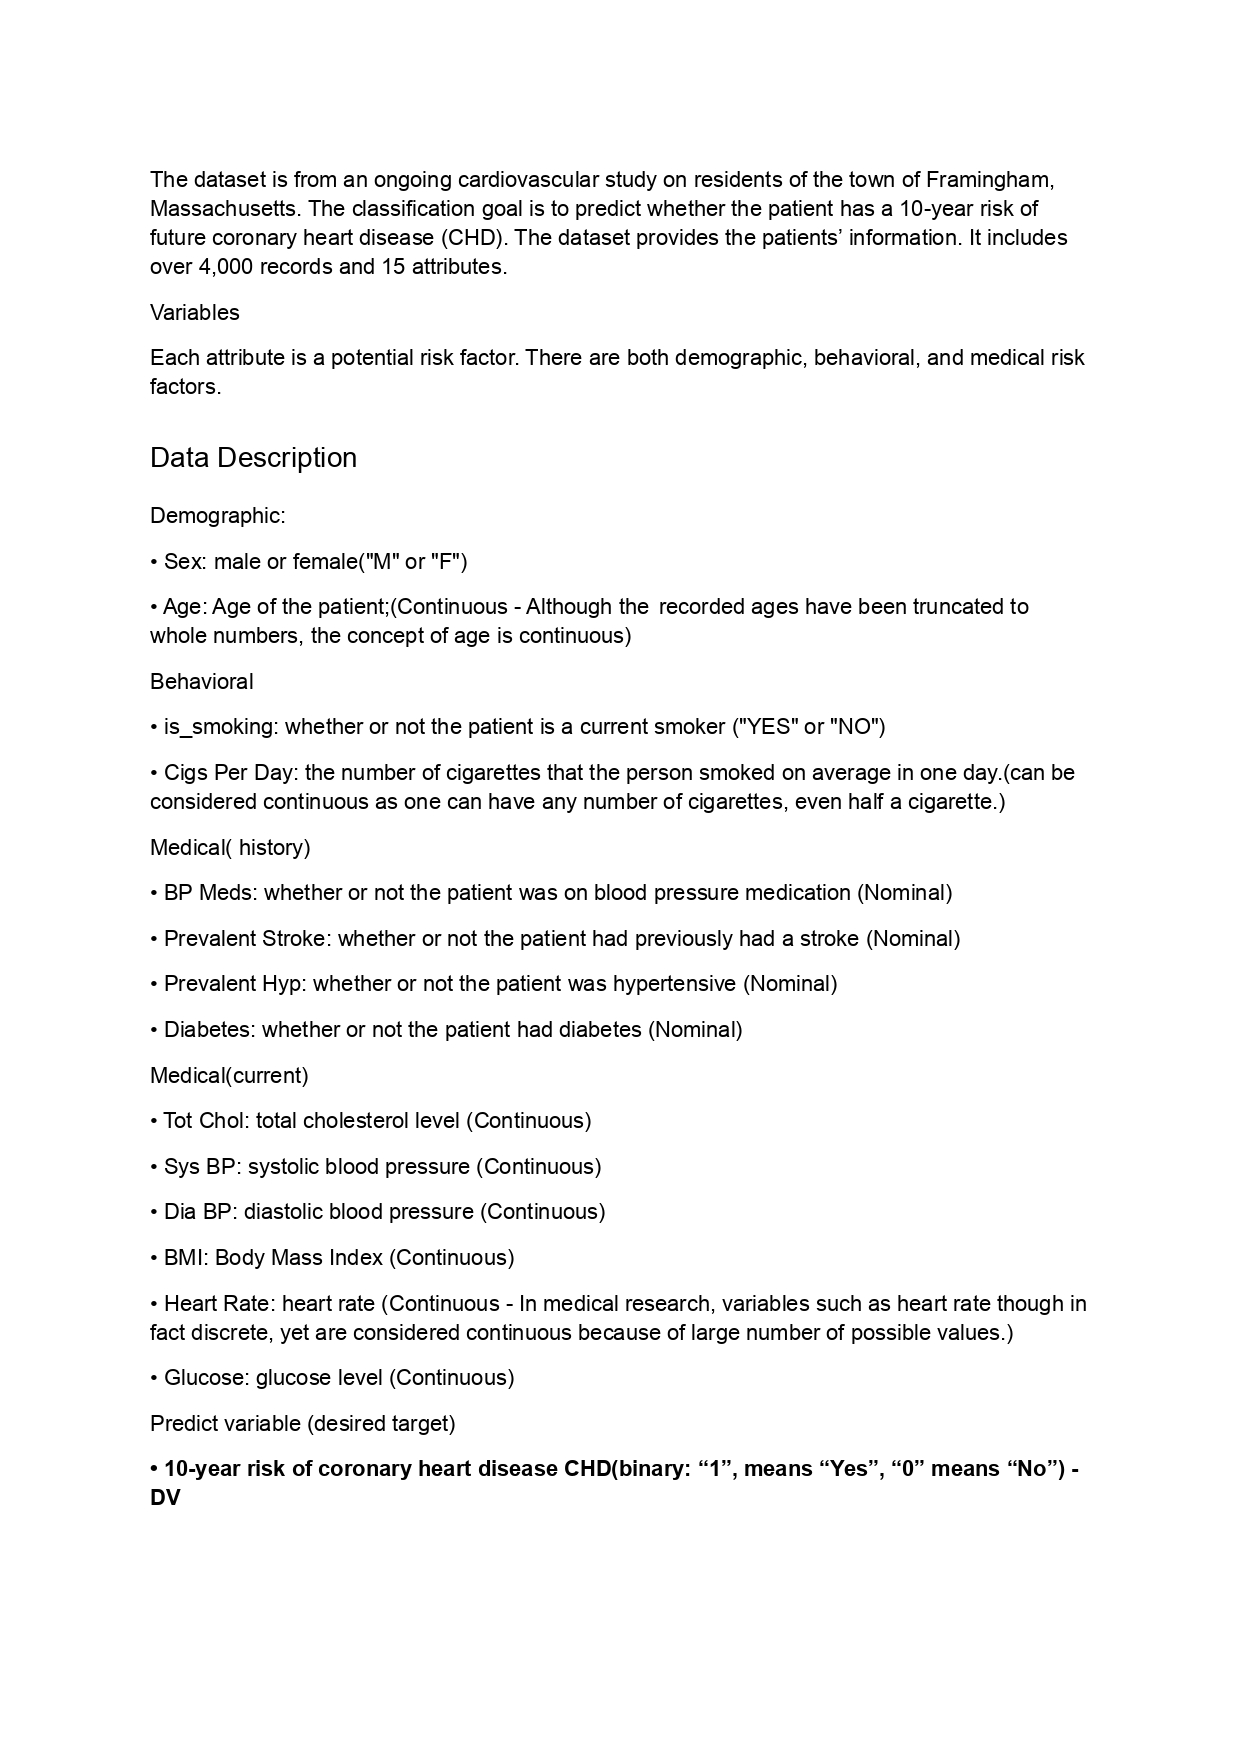

# **Let us now read the dataset and perform a quick analysis**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Let us import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Let us load and read the dataset
crp_df = pd.read_csv("/content/drive/MyDrive/ML_Cardiovascular_Risk_Pred_Project/data_cardiovascular_risk.csv")

In [ ]:
crp_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
crp_df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [ ]:
crp_df.shape

(3390, 17)

In [ ]:
crp_df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
crp_df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
def crp_dfinfo():
    temp = pd.DataFrame(index=crp_df.columns)
    temp['data_type'] = crp_df.dtypes
    temp["count of non null values"] = crp_df.count()
    temp['NaN values'] = crp_df.isnull().sum()
    temp['% NaN values'] = (temp['NaN values']/len(crp_df)).round(4)*100 # or crp_df.isnull().mean()
    temp['unique_count'] = crp_df.nunique()
    return temp 
crp_dfinfo()

,data_type,count of non null values,NaN values,% NaN values,unique_count
id,int64,3390,0,0.00,3390
age,int64,3390,0,0.00,39
education,float64,3303,87,2.57,4
sex,object,3390,0,0.00,2
is_smoking,object,3390,0,0.00,2
cigsPerDay,float64,3368,22,0.65,32
BPMeds,float64,3346,44,1.30,2
prevalentStroke,int64,3390,0,0.00,2
prevalentHyp,int64,3390,0,0.00,2
diabetes,int64,3390,0,0.00,2


The above data gives us a brief summary of the NaN values in the given data set.

In [ ]:
# Let us check for duplicates

duplicate_df = crp_df[crp_df.duplicated()]
duplicate_df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


No duplicates found.

In [ ]:
# Let us check the majority and minority set of the target variable
crp_df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

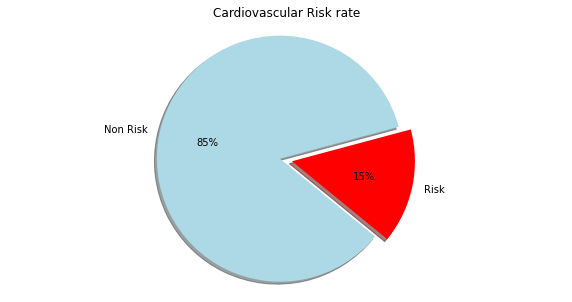

In [ ]:
# Let us plot the majority and minority set of the target variable
labels = 'Non Risk',"Risk"
my_colors = ['lightblue','red']
my_explode = (0,0.1)
plt.figure(figsize=(10,5))
plt.pie(crp_df['TenYearCHD'].value_counts(), labels=labels ,autopct='%1.0f%%', startangle =15, shadow =True, colors = my_colors, explode=my_explode )
plt.title("Cardiovascular Risk rate")
plt.axis('equal')
plt.show()

**85% people - No Risk - Majority Class**

**15% people - Risk - Minority Class**

# **Data Cleaning**

## **Handling NaN values**

In [ ]:
# Let us drop the ID column as it is unique and not of much use for this analysis.
crp_df.drop('id',axis=1,inplace=True)

In [ ]:
# Let us check the new shape
crp_df.shape

(3390, 16)

In [ ]:
crp_df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# Total NaN values
(crp_df.isnull().sum()).sum()

510

In [ ]:
crp_df.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
# Let us check if any of the NaN values belong to the minority class
print(f'Education:total NaN value is = {crp_df.education.isnull().sum()}, MinorityNaN count = {crp_df[(crp_df["TenYearCHD"]==1) & (crp_df.education.isnull())].shape}')
print(f'cigsPerDay:total NaN value is = {crp_df.cigsPerDay.isnull().sum()}, MinorityNaN count = {crp_df[(crp_df["TenYearCHD"]==1) & (crp_df.cigsPerDay.isnull())].shape}')
print(f'BPMeds:total NaN value is = {crp_df.BPMeds.isnull().sum()}, MinorityNaN count = {crp_df[(crp_df["TenYearCHD"]==1) & (crp_df.BPMeds.isnull())].shape}')
print(f'totChol:total NaN value is = {crp_df.totChol.isnull().sum()}, MinorityNaN count = {crp_df[(crp_df["TenYearCHD"]==1) & (crp_df.totChol.isnull())].shape}')
print(f'BMI:total NaN value is = {crp_df.BMI.isnull().sum()}, MinorityNaN count = {crp_df[(crp_df["TenYearCHD"]==1) & (crp_df.BMI.isnull())].shape}')
print(f'heartRate:total NaN value is = {crp_df.heartRate.isnull().sum()}, MinorityNaN count = {crp_df[(crp_df["TenYearCHD"]==1) & (crp_df.heartRate.isnull())].shape}')
print(f'glucose:total NaN value is = {crp_df.glucose.isnull().sum()}, MinorityNaN count = {crp_df[(crp_df["TenYearCHD"]==1) & (crp_df.glucose.isnull())].shape}')

Education:total NaN value is = 87, MinorityNaN count = (13, 16)
cigsPerDay:total NaN value is = 22, MinorityNaN count = (1, 16)
BPMeds:total NaN value is = 44, MinorityNaN count = (7, 16)
totChol:total NaN value is = 38, MinorityNaN count = (7, 16)
BMI:total NaN value is = 14, MinorityNaN count = (7, 16)
heartRate:total NaN value is = 1, MinorityNaN count = (1, 16)
glucose:total NaN value is = 304, MinorityNaN count = (39, 16)


Simplest way to infer the above data is as below#

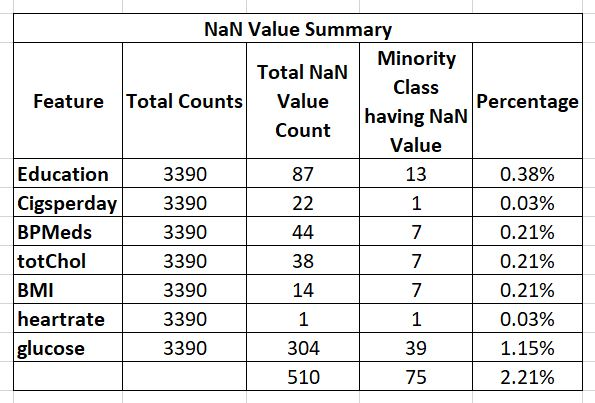

Dropping the NaN values will lead to 2.21% loss of the minority set, which is already at 15%. Let us impute values to these, so that we don't loose the minority class data.

**KNNImputer** shall be used to impute the NaN values for continuous data.

**SimpleImputer** shall be used to impute the NaN values for categorical data.

**missing_value_continuous** function to handle missing values of continuous data.

**variables missing_value_categorical** function to handle missing values of categorical data.

In [ ]:
# Identify the categorical and numerical columns to check the data distribution

column_datatypes= crp_df.drop("TenYearCHD",axis=1).dtypes
categorical_columns=list(column_datatypes[column_datatypes=="object"].index.values)
continous_columns=list(column_datatypes[(column_datatypes=="int64") | (column_datatypes=="float64") ].index.values)

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

In [ ]:
class Data_preprocessing:
  def __init__(self,train_data):
        self.train_data = train_data

  def missing_value_continous(self,columns_with_specific_type,neighbors=3):
    knn_imputer= KNNImputer(n_neighbors=neighbors)

    knn_imputer.fit(self.train_data[columns_with_specific_type])
    self.train_data[columns_with_specific_type]= knn_imputer.transform(self.train_data[columns_with_specific_type])
    return self.train_data

  def missing_value_categorical(self,columns_with_specific_type,imputation_type="most_frequent"):
   most_frequent= SimpleImputer(strategy="most_frequent")
   most_frequent.fit(self.train_data[columns_with_specific_type])
   self.train_data[columns_with_specific_type]= most_frequent.transform(self.train_data[columns_with_specific_type])
   return self.train_data

In [ ]:
dlist= [crp_df]
for df in dlist:
  #create class object
  dat= Data_preprocessing(df)
  df= dat.missing_value_continous(continous_columns)
  df= dat.missing_value_categorical(categorical_columns)

In [ ]:
crp_df.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

NaN values have now been filled.

## **Outlier Treatment**

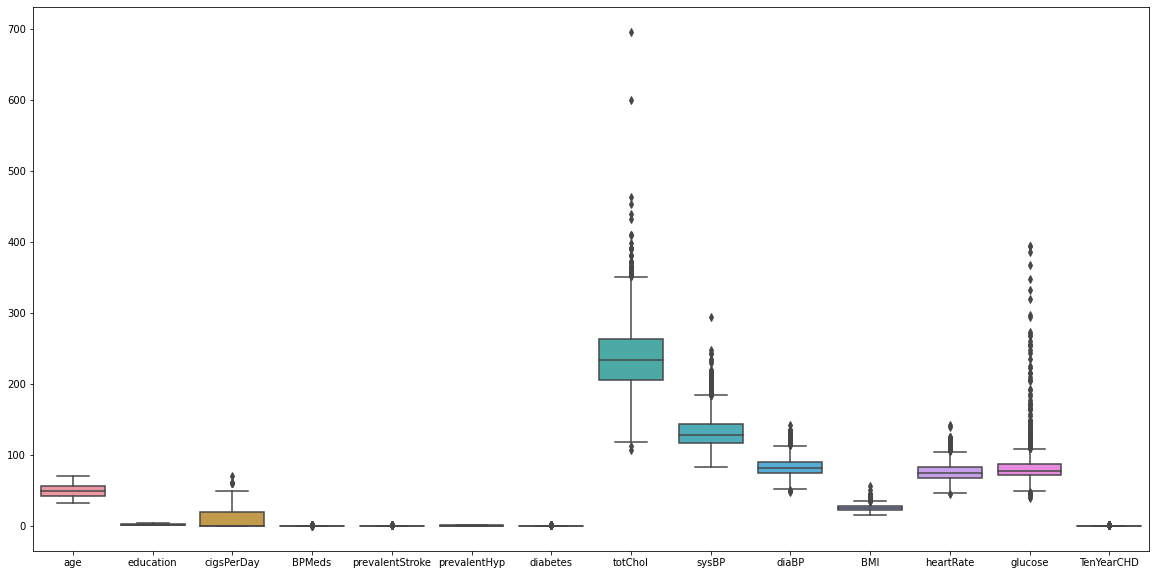

In [ ]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=crp_df)
plt.show()


Outliers are important here and we simply cannot remove them because there could be a possibility that a person might have a high risk and removing it, would lead to ignorance of the same. This would further affect the machine learning model.

In [ ]:
print(crp_df.totChol.min())
print(crp_df.totChol.max())
print(crp_df.totChol.mean())

107.0
696.0
237.07305801376597


We can clearly see higher value (i.e. 600) in the Totalchol in the box plot. This is now being replaced with average value for the ease of analysis purpose.

In [ ]:
# We replaced 600 with 500 because we are focusing on people having risk of heart disease in future.
crp_df['totChol'] = crp_df['totChol'].replace(600.0,500.0) 

In [ ]:
# Let us check
crp_df.loc[420:425,:]

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
420,40.0,2.0,F,YES,20.000000,0.0,0.0,0.0,0.0,165.0,101.0,59.0,23.06,60.0,76.0,0
421,50.0,1.0,F,NO,0.000000,0.0,0.0,0.0,0.0,281.0,107.5,74.0,23.44,85.0,79.0,0
422,55.0,1.0,F,YES,9.666667,0.0,0.0,1.0,0.0,213.0,163.0,91.0,28.66,69.0,66.0,0
423,52.0,2.0,F,NO,0.000000,0.0,0.0,1.0,1.0,500.0,159.5,94.0,28.27,78.0,140.0,1
424,48.0,2.0,F,NO,0.000000,0.0,0.0,0.0,0.0,237.0,124.5,66.5,33.29,80.0,91.0,0
425,43.0,4.0,M,YES,20.000000,0.0,0.0,0.0,0.0,187.0,129.5,88.0,25.62,80.0,75.0,0


Finally the data cleaning part is done with handling NaN values and outlier treatment.

# **Feature Engineering**

## **One Hot Encoding**

Let us know focus on converting the categorical columns into numbers which can be read by the algorithms.

We have two features i.e.

1. sex - Male(M)/Female(F) which needs to be converted to 1 / 0

2. is_smoking - YES/NO which needs to be converted to 1 / 0


In [ ]:
# One Hot Encoding to the variables- SEX and IS_SMOKING:
# binary encoding
crp_df['sex']= crp_df['sex'].apply(lambda x: 1 if x=='M' else 0)
crp_df['is_smoking']= crp_df['is_smoking'].apply(lambda x: 1 if x=='YES' else 0)

In [ ]:
crp_df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64.0,2.0,0,1,3.0,0.0,0.0,0.0,0.0,221.0,148.0,85.0,30.913333,90.0,80.0,1
1,36.0,4.0,1,0,0.0,0.0,0.0,1.0,0.0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,46.0,1.0,0,1,10.0,0.0,0.0,0.0,0.0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,50.0,1.0,1,1,20.0,0.0,0.0,1.0,0.0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,64.0,1.0,0,1,30.0,0.0,0.0,0.0,0.0,241.0,136.5,85.0,26.420000,70.0,77.0,0


## **Co-relation of features**

In [ ]:
crp_df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# Let us divide the given columns into continous and discrete
continous_columns_list = ['age','cigsPerDay', 'totChol','sysBP','diaBP', 'BMI', 'heartRate', 'glucose']
discrete_columns_list = ['education','sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes']

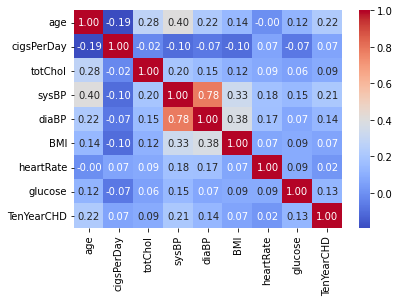

In [ ]:
cont_col = continous_columns_list.copy() 
#correlation matrix between numerical variables and RISK of getting heart disease
cont_col.append('TenYearCHD')
g= sns.heatmap(crp_df[cont_col].corr(),annot=True,fmt='.2f',cmap='coolwarm')

sysBP & diaBP are co-related to each other. The co-relation is **0.78**.

sysBP & TenYearCHD has a co-relation of **0.21**.

diaBP & TenYearCHD has a co-relation of **0.14**.

For a healthy human, the BP is 120/80.

Let us derive a new feature i.e. avgBP which would be defined by the below formula

**avgBP = (sysBP + diaBP)/2**

In [ ]:
crp_df["avgBP"]= round((crp_df["sysBP"]+crp_df["diaBP"])/2,2)

In [ ]:
# Let us check the co-relation of avgBP and TenYearCHD
crp_df["avgBP"].corr(crp_df["TenYearCHD"])

0.1957935000660334

In [ ]:
# Since avgBP has been added, we can now remove sysBP & diaBP
crp_df.drop("sysBP",axis=1,inplace=True)
crp_df.drop("diaBP",axis=1,inplace=True)

In [ ]:
cont_col = ['age',
 'cigsPerDay',
 'totChol',
 'avgBP',
 'BMI',
 'heartRate',
 'glucose']

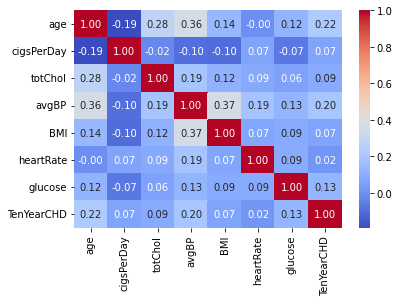

In [ ]:
#correlation matrix between numerical variables and RISK of getting heart disease
cont_col.extend(['TenYearCHD'])
g= sns.heatmap(crp_df[cont_col].corr(),annot=True,fmt='.2f',cmap='coolwarm')

In [ ]:
crp_df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,avgBP
0,64.0,2.0,0,1,3.0,0.0,0.0,0.0,0.0,221.0,30.913333,90.0,80.0,1,116.50
1,36.0,4.0,1,0,0.0,0.0,0.0,1.0,0.0,212.0,29.770000,72.0,75.0,0,133.00
2,46.0,1.0,0,1,10.0,0.0,0.0,0.0,0.0,250.0,20.350000,88.0,94.0,0,93.50
3,50.0,1.0,1,1,20.0,0.0,0.0,1.0,0.0,233.0,28.260000,68.0,94.0,1,123.00
4,64.0,1.0,0,1,30.0,0.0,0.0,0.0,0.0,241.0,26.420000,70.0,77.0,0,110.75


# **EDA - Feature Analysis**

In [ ]:
crp_df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD', 'avgBP'],
      dtype='object')

In [ ]:
continous_columns_list = ['age','cigsPerDay', 'totChol','avgBP','BMI', 'heartRate', 'glucose']
discrete_columns_list = ['education','BPMeds','sex','is_smoking','prevalentStroke','prevalentHyp','diabetes']

## **EDA - Feature Analysis on Continuous Features**

<Figure size 720x432 with 0 Axes>

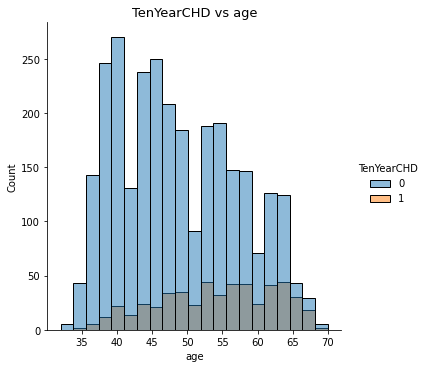

<Figure size 720x432 with 0 Axes>

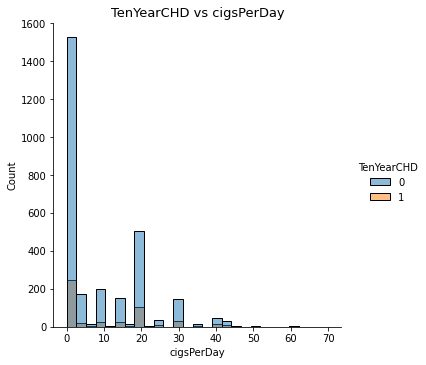

<Figure size 720x432 with 0 Axes>

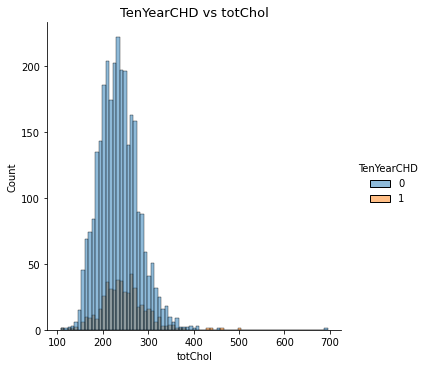

<Figure size 720x432 with 0 Axes>

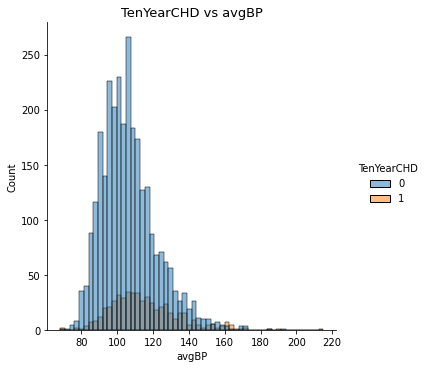

<Figure size 720x432 with 0 Axes>

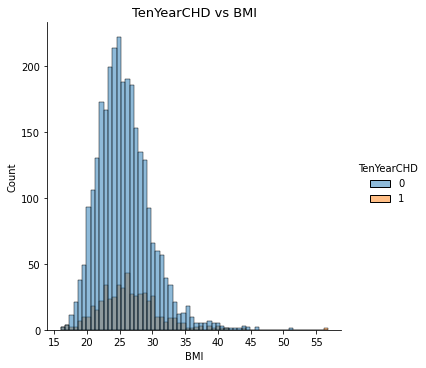

<Figure size 720x432 with 0 Axes>

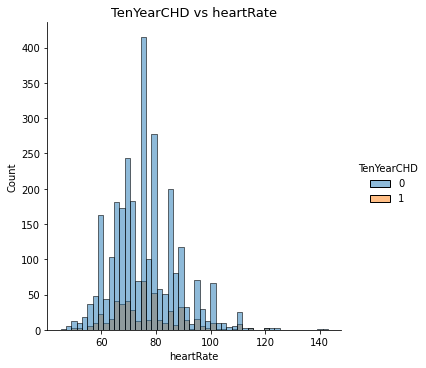

<Figure size 720x432 with 0 Axes>

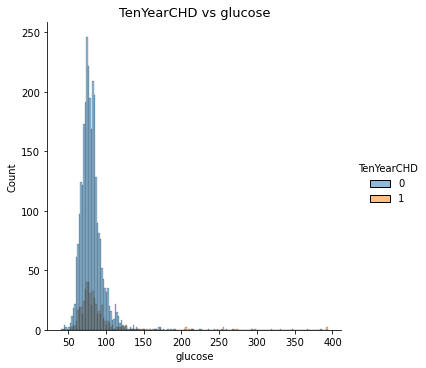

In [ ]:
for i, ii in enumerate(continous_columns_list):
  plt.figure(figsize = (10,6))
  #sns.distplot(data=df, y=ii, x=cat_cols[-1], kind='box')
  sns.displot(df, x=ii, hue="TenYearCHD")
  plt.title(f'TenYearCHD vs {ii}', fontsize=13)
  plt.show()

**Inference:** 

1. **Glucose** slightly shows a bit of **right skewness**. But since we are concerned about people with cardiovascular issues we consider the right skewed values as an important information so we left it as it is.

2. **cigsPerDay** is not following Gaussian/Normal distribution and from the dist plot as well as the kde plot we did not get any inference w.r.t target variable.

## **EDA - Feature Analysis on Discrete Features**

<Figure size 720x432 with 0 Axes>

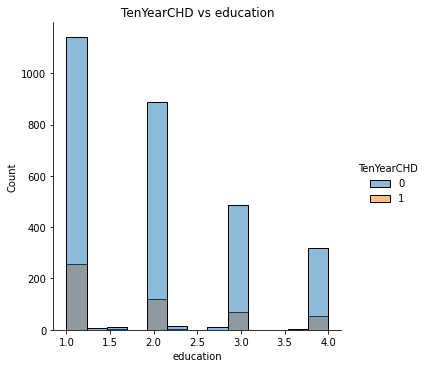

<Figure size 720x432 with 0 Axes>

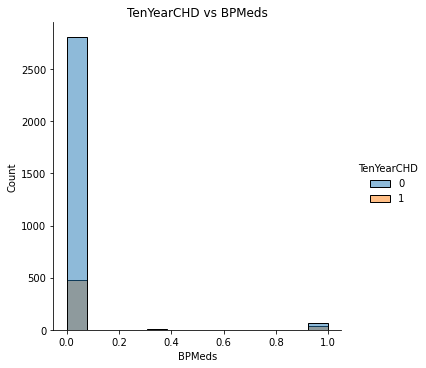

<Figure size 720x432 with 0 Axes>

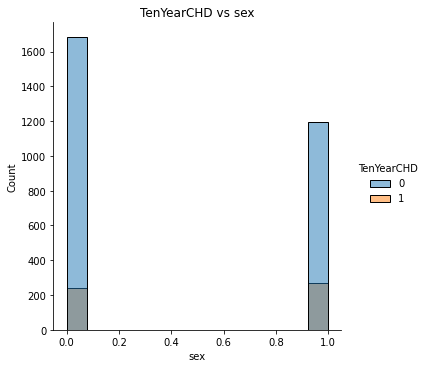

<Figure size 720x432 with 0 Axes>

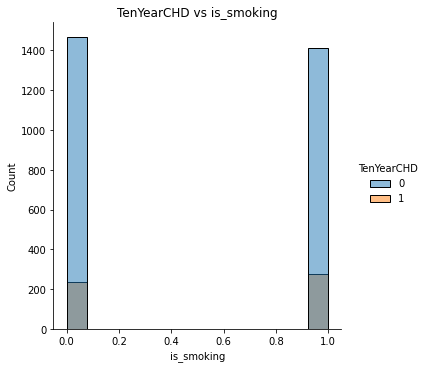

<Figure size 720x432 with 0 Axes>

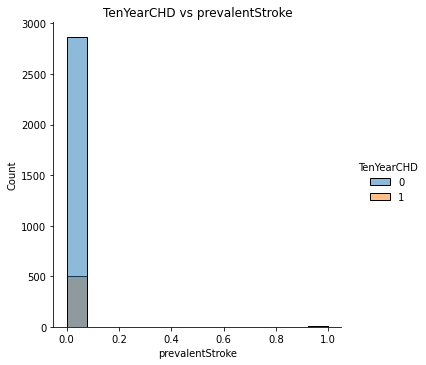

<Figure size 720x432 with 0 Axes>

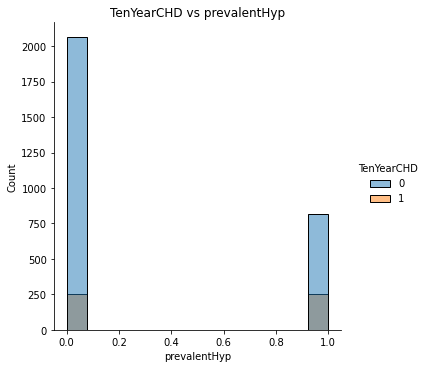

<Figure size 720x432 with 0 Axes>

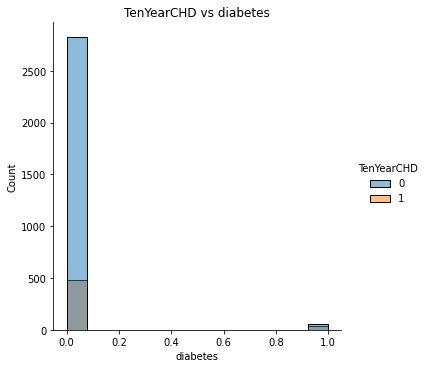

In [ ]:
# Dependent variable vs categorical features
for i, ii in enumerate(discrete_columns_list):
  plt.figure(figsize = (10,6))
  sns.displot(df, x=ii, hue="TenYearCHD")
  plt.title(f'TenYearCHD vs {ii}')
  plt.show()

**Inference:**

1. **Education** is important, as it is evident that if people are aware, they take care and precautions in order to avoid the risk of CHD.

2. **BPMeds, Prevalentstroke, diabetes** have very **low variance**, thus we are unable to come up with any generalized conclusion about the co-relation between their history and prevalence of cardiovascular risk.

## **Heat-Map**

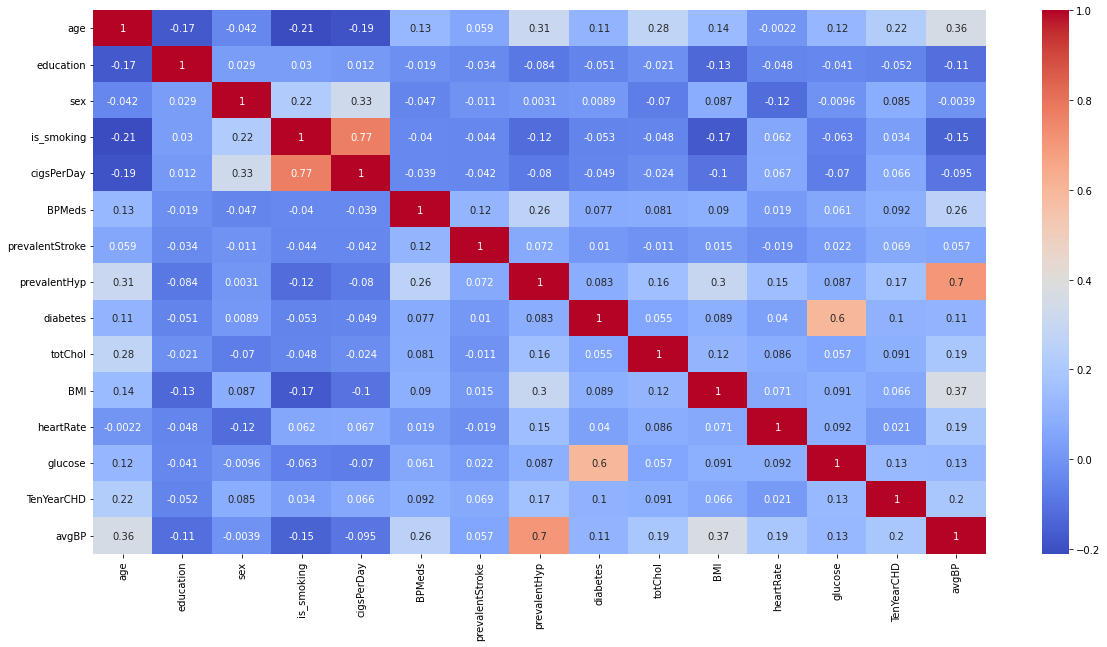

In [ ]:
#Bivariate Analysis: Corelation Matrix
fig, ax = plt.subplots(figsize = ( 20 , 10 ))
correlation = crp_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

**Inference:**

It is evident from the above graph that the features having low variance i.e., **BPMeds, Prevalentstroke, diabetes** do not have any direct or good linear relationship with the target variable(TenYearCHD).

# **EDA on Features**

# **Age & Sex v/s Risk**

In [ ]:
crp_df['sex'].unique()

array([0, 1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'Male')

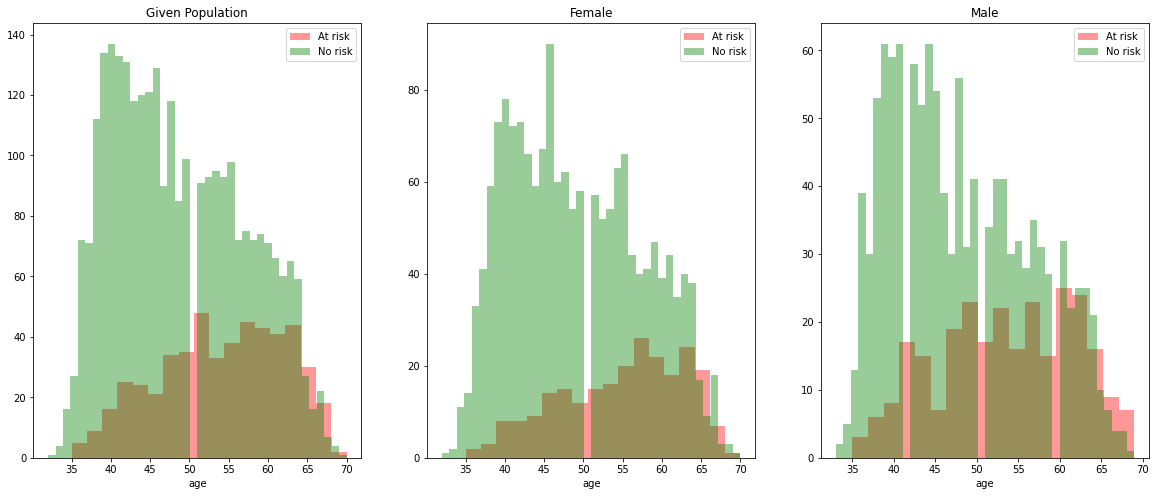

In [ ]:
at_risk = "At risk"
no_risk= "No risk"
fig , axes= plt.subplots(nrows=1,ncols=3,figsize=(20,8))
ax= sns.distplot(crp_df[crp_df['TenYearCHD']==1].age,bins=18,label=at_risk,ax=axes[0],color='r',kde=False)
ax= sns.distplot(crp_df[crp_df['TenYearCHD']==0].age,bins=40,label=no_risk,ax=axes[0],color='g' ,kde=False)
ax.legend()
ax.set_title("Given Population")
women= crp_df[crp_df['sex']==0]
men= crp_df[crp_df['sex']==1]
ax= sns.distplot(women[women['TenYearCHD']==1].age,bins=18,label=at_risk,ax=axes[1],color='r',kde=False)
ax= sns.distplot(women[women['TenYearCHD']==0].age,bins=40,label=no_risk,ax=axes[1],color='g',kde=False)
ax.legend()
ax.set_title("Female")
ax= sns.distplot(men[men['TenYearCHD']==1].age,bins=18,label=at_risk,ax=axes[2],color='r',kde=False)
ax= sns.distplot(men[men['TenYearCHD']==0].age,bins=40,label=no_risk,ax=axes[2],color='g',kde=False)
ax.legend()
ax.set_title("Male")

**Inference:**

We can infer the below from the above graphs:

1. Both women and men lying in Age group of 50 and above have high risk of heart disease.

2. Men above 45 years are usually at risk, where as women above 55 years are usually at risk.

3. Men are more likely to have heart disease compared to women.

## **Age & Smoking v/s Risk**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/u

Text(0.5, 1.0, 'NonSmokers')

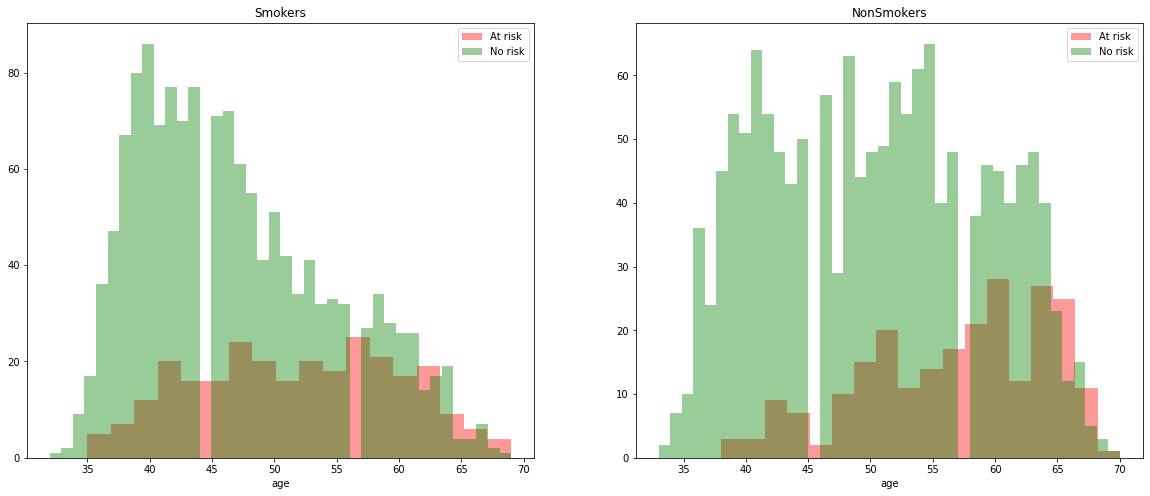

In [ ]:
at_risk = "At risk"
no_risk= "No risk"
smoking= crp_df[crp_df['is_smoking']==1]
non_smoking= crp_df[crp_df['is_smoking']==0]
fig , axes= plt.subplots(nrows=1,ncols=2,figsize=(20,8))
ax= sns.distplot(smoking[crp_df['TenYearCHD']==1].age,bins=18,label=at_risk,ax=axes[0],color='r',kde=False)
ax= sns.distplot(smoking[crp_df['TenYearCHD']==0].age,bins=40,label=no_risk,ax=axes[0],color='g',kde=False)
ax.legend()
ax.set_title("Smokers")

ax= sns.distplot(non_smoking[crp_df['TenYearCHD']==1].age,bins=18,label=at_risk,ax=axes[1],color='r',kde=False)
ax= sns.distplot(non_smoking[crp_df['TenYearCHD']==0].age,bins=40,label=no_risk,ax=axes[1],color='g',kde=False)
ax.legend()
ax.set_title("NonSmokers")

**Inference:**

Age clearly plays an important role irrespetive of smoking or not, which is clearly evident from the above two plots.

## **CigsPerDay & Sex v/s Risk**

In [ ]:
crp_df['is_smoking'].unique()

array([1, 0])

In [ ]:
crp_df['cigsPerDay']=crp_df['cigsPerDay'].astype(int)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


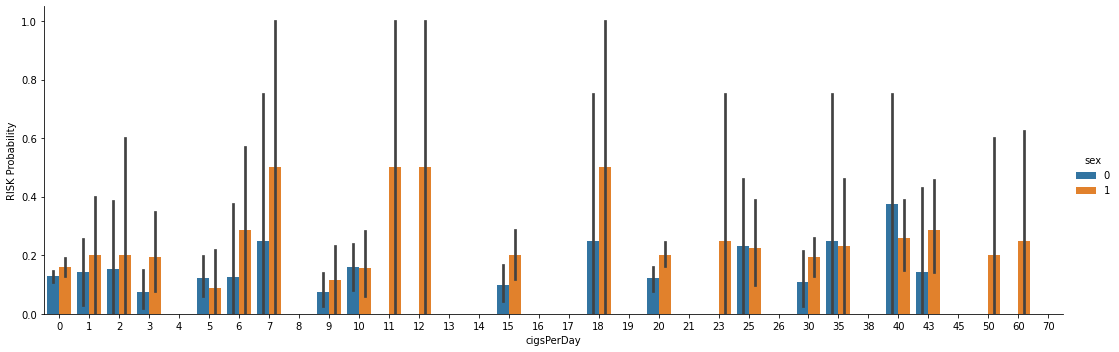

In [ ]:
g=sns.factorplot('cigsPerDay','TenYearCHD',kind='bar',
                    data=crp_df,hue='sex',aspect=3)
g=g.set_ylabels("RISK Probability")

**Inference:**

1. It is very difficult to say, if consumption of less or no cigarettes mean lower risk levels.

2. Male have more tendency of developing risk than females, since smoking levels of male is higher than that of female smokers.

## **Diabetes & Age v/s Risk**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


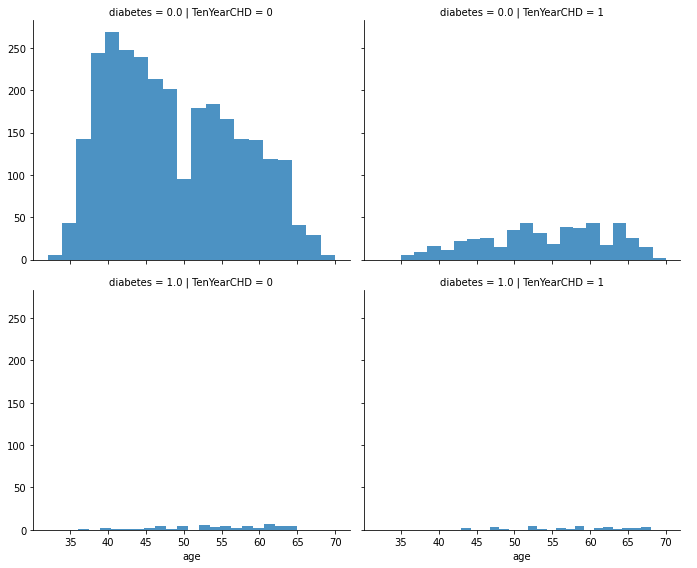

In [ ]:
grid= sns.FacetGrid(crp_df,col='TenYearCHD',row='diabetes',size=4,aspect=1.2,palette='viridis')
grid.map(plt.hist,'age',alpha=.8,bins=20)
grid.add_legend();

**Inference:**

1. Non-Diabetic - Lesser risk of CHD.

2. Diabetic - Higher risk of CHD.

# **Data Splitting, Training & Modelling**

## **Data Splitting**

In [ ]:
# Let us make a copy
new_crp = crp_df.copy() 

In [ ]:
new_crp.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,avgBP
0,64.0,2.0,0,1,3,0.0,0.0,0.0,0.0,221.0,30.913333,90.0,80.0,1,116.50
1,36.0,4.0,1,0,0,0.0,0.0,1.0,0.0,212.0,29.770000,72.0,75.0,0,133.00
2,46.0,1.0,0,1,10,0.0,0.0,0.0,0.0,250.0,20.350000,88.0,94.0,0,93.50
3,50.0,1.0,1,1,20,0.0,0.0,1.0,0.0,233.0,28.260000,68.0,94.0,1,123.00
4,64.0,1.0,0,1,30,0.0,0.0,0.0,0.0,241.0,26.420000,70.0,77.0,0,110.75


In [ ]:
# Let us now split
X = new_crp.drop(['TenYearCHD'], axis=1)
y = new_crp['TenYearCHD']

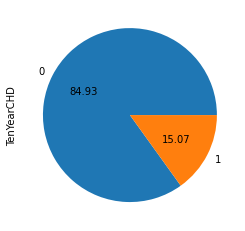

In [ ]:
# Show pie plot (Approach 1)
y.value_counts().plot.pie(autopct='%.2f')

As per the above plot our target feature i.e., TenYearCHD, the risk rate is relatively rare, only **15% of the people have this disease**.

Hence even if our model gives 94% accuracy! It is misleading.

All those non-risk cases, we’d have 100% accuracy. Those cases in which a person has a risk, we’d have 0% accuracy.

Hence our Evaluation Metrics for class imbalance problems (especiallly health data) would be **RECALL, ROC SCORE**.

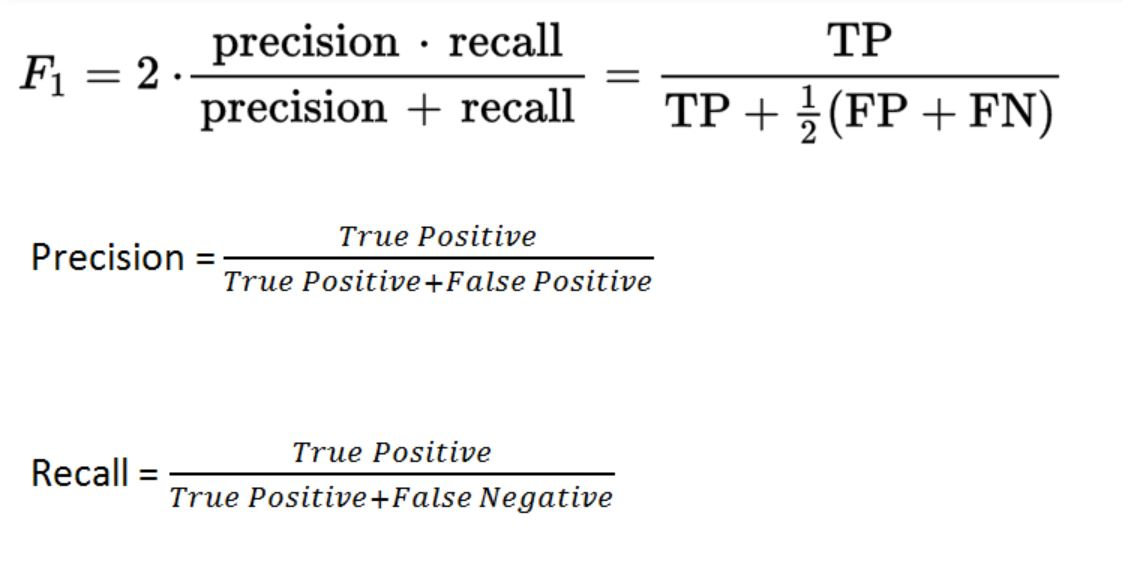

## **Handling Imbalance Data**

The two mostly commonly used methods for handling class imbalance are:

1. Undersampling the majority class

2. Oversampling the minority class

Oversampling can be defined as adding more copies to the minority class. It can be a good choice when you do not have a tonne of data to work with.

Disadvantage of undersampling is that it can cause loss of information and poor generalization to your test set.



**SMOTE:**

In order to reduce overfitting during oversampling, synthetic sampling is used. SMOTE (Synthetic Minority Over Sampling Technique) is one popular algorithm. Instead of using copies of observations to oversample, SMOTE varies attributes of the observations to create new synthetic samples. Hence we choosed SMOTE Method for our data.

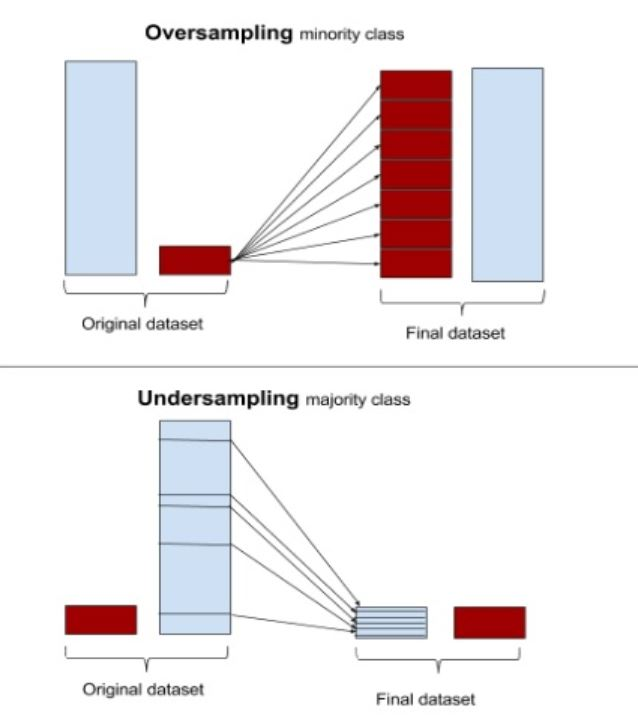

In [ ]:
#Using SMOTE for oversampling
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', len(new_crp))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 3390
Resampled dataset shape 5758


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_resampled= pd.DataFrame(x_smote)
y_resampled= pd.DataFrame(y_smote)

In [ ]:
y_resampled[0].value_counts()

1    2879
0    2879
Name: 0, dtype: int64

**DATA** is now balanced.

## **Standardization**

In [ ]:
# Performing Standardization
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X = standardizer.fit_transform(X_resampled)

In [ ]:
X = pd.DataFrame(X,columns= (new_crp.drop(['TenYearCHD'], axis=1).columns))

## **Data Modelling & Training**

We shall study the following training models#

1. Logistic Regression

2. K Nearest Neighbour

3. Decision Tree

4. Support Vector Machine

In [ ]:
# Importing all the essesntial Libraries.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split

In [ ]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y_resampled , test_size=0.25,stratify = y_resampled, random_state=0)

### **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_predictions= lr.predict(X_test)

#Performance Metrics
lr_accuracy= accuracy_score(lr_predictions,y_test)
lr_precision= precision_score(lr_predictions,y_test)
lr_recall= recall_score(lr_predictions,y_test)
lr_f1_score= f1_score(lr_predictions, y_test)

print('Performance of Logistic Regression Classifier')
print('Accuracy :' , lr_accuracy)
print('Precision :', lr_precision)
print('Recall :', lr_recall)
print('F1 Score :', lr_f1_score)

Performance of Logistic Regression Classifier
Accuracy : 0.6791666666666667
Precision : 0.6763888888888889
Recall : 0.6801675977653632
F1 Score : 0.6782729805013928


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 1080x576 with 0 Axes>

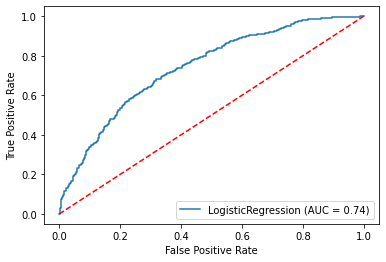

In [ ]:
# Let us plot ROC curve
from sklearn.metrics import plot_roc_curve
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(lr,X_test,y_test)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

**Hyper-Parameter tuning for Logistic Regression**

In [ ]:
#Hyperparameter Tuning for Logistic Regression
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2'] # By default its l1
c_values = [100, 10, 1.0, 0.1, 0.01] # less the c values 
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values) 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) # 5*3*15 = 225
grid_search_lr = GridSearchCV(estimator=lr, param_grid=grid, n_jobs=10, cv=cv, scoring='f1',error_score=0,verbose=3)
grid_result = grid_search_lr.fit(X_train, y_train)

Fitting 30 folds for each of 15 candidates, totalling 450 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:    4.8s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:    8.4s
[Parallel(n_jobs=10)]: Done 268 tasks      | elapsed:   11.5s
[Parallel(n_jobs=10)]: Done 450 out of 450 | elapsed:   15.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# summarize results - logistic regression
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.668782 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [ ]:
lr_predictions= grid_search_lr.predict(X_test)

#Performance Metrics
lr_accuracy= accuracy_score(lr_predictions,y_test)
lr_precision= precision_score(lr_predictions,y_test)
lr_recall= recall_score(lr_predictions,y_test)
lr_f1_score= f1_score(lr_predictions, y_test)

print('Performance of Logistic Regression Classifier after hyperparameter tuning')
print('Accuracy :' , lr_accuracy)
print('Precision :', lr_precision)
print('Recall :', lr_recall)
print('F1 Score :', lr_f1_score)

Performance of Logistic Regression Classifier after hyperparameter tuning
Accuracy : 0.6798611111111111
Precision : 0.6777777777777778
Recall : 0.6806136680613668
F1 Score : 0.6791927627000696


<Figure size 1080x576 with 0 Axes>

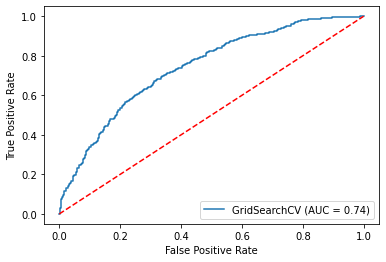

In [ ]:
# Let us plot ROC curve
from sklearn.metrics import plot_roc_curve
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(grid_search_lr,X_test,y_test)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

**Inference:**

There was not much difference before and after hyper-parameter tuning.



**NOTE:** We used both 5 and 10 splits and it was repeated 3 times. The result was still the same, especially recall and F1 score are were the same.

### **K-Nearest Neighbor**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
knn= KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_predictions= knn.predict(X_test)

#Performance Metrics
knn_accuracy= accuracy_score(knn_predictions,y_test)
knn_precision= precision_score(knn_predictions,y_test)
knn_recall= recall_score(knn_predictions,y_test)
knn_f1_score= f1_score(knn_predictions, y_test)

print('Performance of KNN Classifier')
print('Accuracy :' , knn_accuracy)
print('Precision :', knn_precision)
print('Recall :', knn_recall)
print('F1 Score :', knn_f1_score)

Performance of KNN Classifier
Accuracy : 0.80625
Precision : 0.9055555555555556
Recall : 0.7555040556199305
F1 Score : 0.8237523689197725


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 1080x576 with 0 Axes>

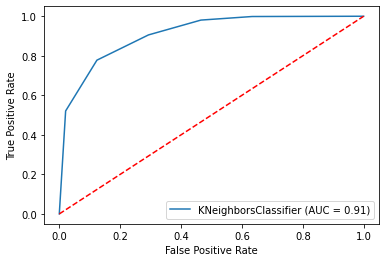

In [ ]:
# Let us plot ROC curve
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(knn,X_test,y_test)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

**Hyper-Parameter tuning for K-Nearest Neighbor**

In [ ]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
grid_search_knn = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy',return_train_score = False,verbose=1)
  

grid_search_knn.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selec

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [ ]:
# The Best Parameters
print('Best Parameters:', grid_search_knn.best_estimator_.get_params())

Best Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}


In [ ]:
knn_predictions= grid_search_knn.predict(X_test)

#Performance Metrics
knn_accuracy= accuracy_score(knn_predictions,y_test)
knn_precision= precision_score(knn_predictions,y_test)
knn_recall= recall_score(knn_predictions,y_test)
knn_f1_score= f1_score(knn_predictions, y_test)

print('Performance of KNN')
print('Accuracy :' , knn_accuracy)
print('Precision :', knn_precision)
print('Recall :', knn_recall)
print('F1 Score :', knn_f1_score)

Performance of KNN
Accuracy : 0.8638888888888889
Precision : 0.8527777777777777
Recall : 0.8721590909090909
F1 Score : 0.8623595505617977


<Figure size 1080x576 with 0 Axes>

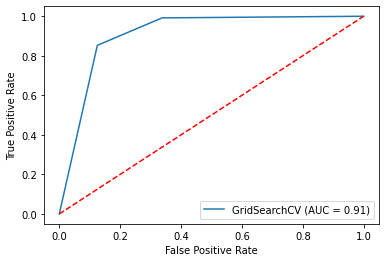

In [ ]:
# Let us plot ROC curve
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(grid_search_knn,X_test,y_test)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

**Inference:**

**Before Hyperparameter Tuning:**

AUC score = 91%

Recall : 78%

F1 Score : 84%

***After Hyperparameter Tuning:***

AUC score = 89%

Recall : 84%

F1 Score : 89%

**Hence though AUC got reduced, recall and F1score has increased.**

### **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [ ]:
dTree= DecisionTreeClassifier()
dTree.fit(X_train,y_train)
dTree_predictions= dTree.predict(X_test)

#Performance Metrics
dTree_accuracy= accuracy_score(dTree_predictions,y_test)
dTree_precision= precision_score(dTree_predictions,y_test)
dTree_recall= recall_score(dTree_predictions,y_test)
dTree_f1_score= f1_score(dTree_predictions, y_test)

print('Performance of DecisionTreeClassifier')
print('Accuracy :' , dTree_accuracy)
print('Precision :', dTree_precision)
print('Recall :', dTree_recall)
print('F1 Score :', dTree_f1_score)

Performance of DecisionTreeClassifier
Accuracy : 0.8375
Precision : 0.85
Recall : 0.8292682926829268
F1 Score : 0.8395061728395061


<Figure size 1080x576 with 0 Axes>

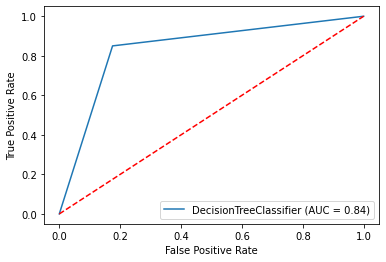

In [ ]:
# Let us plot ROC curve
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(dTree,X_test,y_test)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

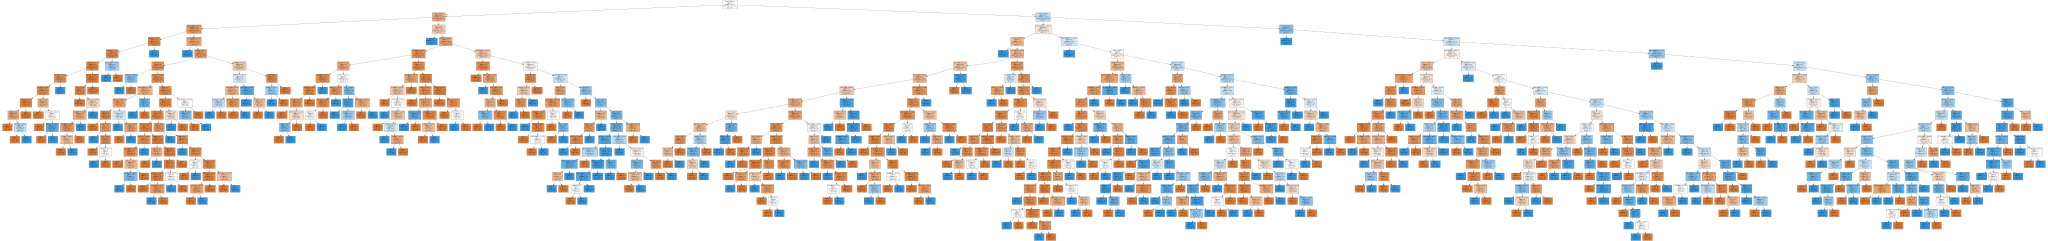

In [ ]:
graph = Source(tree.export_graphviz(dTree, out_file=None
   , feature_names=X_train.columns, class_names=['0', '1'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

**Hyper-Parameter tuning for Decision Tree**

In [ ]:
# Creating a dictionary of all the parameter options 
parameters = {'criterion': ['gini', 'entropy'],
                  'max_depth': range(1,10),
                 # 'min_samples_split': range(1,10),
              #'min_samples_leaf': range(1,5),
              #'random_state': '42'
              'max_features': range(1,11)
              }

# Creating a grid search object
grid_search_dTree = GridSearchCV(estimator=dTree, param_grid=parameters, n_jobs=-1, cv=10, verbose=3)

# Fitting the grid search
grid_search_dTree.fit(X_train, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 252 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 1773 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:   16.0s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                    

In [ ]:
# Viewing The Best Parameters
print('Best Parameters:', grid_search_dTree.best_estimator_.get_params())

Best Parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 9, 'max_features': 9, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


In [ ]:
dTree_predictions= grid_search_dTree.predict(X_test)

#Performance Metrics
dTree_accuracy= accuracy_score(dTree_predictions,y_test)
dTree_precision= precision_score(dTree_predictions,y_test, average='weighted')
dTree_recall= recall_score(dTree_predictions,y_test, average='weighted')
dTree_f1_score= f1_score(dTree_predictions, y_test, average='weighted')

print('Performance of Decision Tree Classifier after hyperparameter tuning')
print('Accuracy :' , dTree_accuracy)
print('Precision :', dTree_precision)
print('Recall :', dTree_recall)
print('F1 Score :', dTree_f1_score)

Performance of Decision Tree Classifier after hyperparameter tuning
Accuracy : 0.8145833333333333
Precision : 0.8152864583333332
Recall : 0.8145833333333333
F1 Score : 0.8146485418050616


<Figure size 1080x576 with 0 Axes>

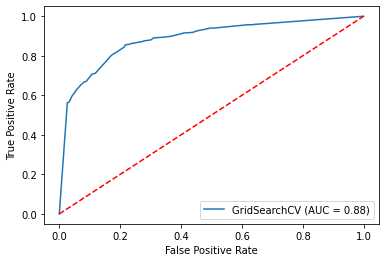

In [ ]:
# Let us plot ROC curve
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(grid_search_dTree,X_test,y_test)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

**Inference:**

We can see an increase in the Recall, F1 Score, AUC_score after hyperparameter tuning.

### **Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
svm= SVC()
svm.fit(X_train,y_train)
svm_predictions= svm.predict(X_test)

#Performance Metrics
svm_accuracy= accuracy_score(svm_predictions,y_test)
svm_precision= precision_score(svm_predictions,y_test)
svm_recall= recall_score(svm_predictions,y_test)
svm_f1_score= f1_score(svm_predictions, y_test)

print('Performance of Support Vector Machine Classifier')
print('Accuracy :' , svm_accuracy)
print('Precision :', svm_precision)
print('Recall :', svm_recall)
print('F1 Score :', svm_f1_score)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Performance of Support Vector Machine Classifier
Accuracy : 0.7868055555555555
Precision : 0.7777777777777778
Recall : 0.7920792079207921
F1 Score : 0.7848633496846531


<Figure size 1080x576 with 0 Axes>

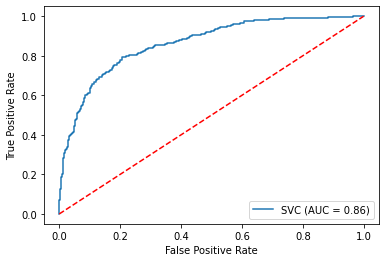

In [ ]:
# Let us plot ROC curve
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(svm,X_test,y_test)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

**Hyper-Parameter Tuning for Support Vector Machine**

In [ ]:
kernel = ['rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_svm = GridSearchCV(estimator=svm, param_grid=grid, n_jobs=10, cv=cv, scoring='f1',error_score=0,verbose=3)
grid_result = grid_search_svm.fit(X_train, y_train)

Fitting 30 folds for each of 10 candidates, totalling 300 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   18.1s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:  1.2min
[Parallel(n_jobs=10)]: Done 268 tasks      | elapsed:  2.7min
[Parallel(n_jobs=10)]: Done 300 out of 300 | elapsed:  3.1min finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.826032 using {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
svm_predictions= grid_search_svm.predict(X_test)

# #Performance Metrics
svm_accuracy= accuracy_score(svm_predictions,y_test)
svm_precision= precision_score(svm_predictions,y_test)
svm_recall= recall_score(svm_predictions,y_test) 
svm_f1_score= f1_score(svm_predictions, y_test)

print('Performance of Support Vector Machine Classifier after hyperparameter tuning')
print('Accuracy :' , svm_accuracy)
print('Precision :', svm_precision)
print('Recall :', svm_recall)
print('F1 Score :', svm_f1_score)

Performance of Support Vector Machine Classifier after hyperparameter tuning
Accuracy : 0.8541666666666666
Precision : 0.8305555555555556
Recall : 0.8717201166180758
F1 Score : 0.8506401137980086


<Figure size 1080x576 with 0 Axes>

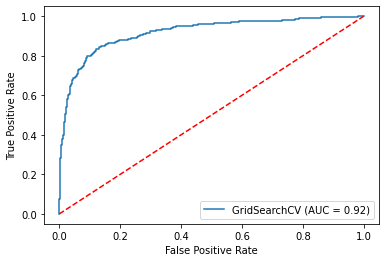

In [ ]:
# Let us plot ROC curve
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(grid_search_svm,X_test,y_test)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

**Inference:**

We can see a good increase in the performance of Recall, F1_Score, AUC_Score.

### **Comparing the performance of all the models**

In [ ]:
#Comparing Performance of all classifiers

models = pd.DataFrame({
    'Model': ['Decision Tree', 'Support Vector Machines', 'K Nearest Neighbour', 'Logistic Regression'],
    'Accuracy': [dTree_accuracy, svm_accuracy, knn_accuracy, lr_accuracy],
    'Precision': [dTree_precision, svm_precision, knn_precision, lr_precision],
    'Recall': [dTree_recall, svm_recall, knn_recall, lr_recall],
    'F1 Score': [dTree_f1_score, svm_f1_score, knn_f1_score, lr_f1_score]})

models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,F1 Score
2,K Nearest Neighbour,0.863889,0.852778,0.872159,0.862360
1,Support Vector Machines,0.854167,0.830556,0.871720,0.850640
0,Decision Tree,0.814583,0.815286,0.814583,0.814649
3,Logistic Regression,0.679861,0.677778,0.680614,0.679193


Conclusion: Among all the classifiers KNN is giving the best performance.